**基于Jupyter的特征工程笔记本1: 数据预处理**  
*作者: 陈颖祥，杨子唅*

**Reference**:  
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
- https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/
- Sarkar, D., Bali, R., & Sharma, T. (2018). Practical Machine Learning with Python. A Problem-Solvers Guide To Building Real-World Intelligent Systems, Berkely.
- https://contrib.scikit-learn.org/categorical-encoding/index.html
- https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
- https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/
- https://kiwidamien.github.io/james-stein-encoder.html
- https://chris-said.io/2017/05/03/empirical-bayes-for-multiple-sample-sizes/
- http://support.sas.com/documentation/cdl/en/prochp/66704/HTML/default/viewer.htm#prochp_hpbin_details02.htm
- https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html
- https://docs.featuretools.com/en/stable/index.html
- https://heartbeat.fritz.ai/introduction-to-automated-feature-engineering-using-deep-feature-synthesis-dfs-3feb69a7c00b

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Prepocessing-数据预处理" data-toc-modified-id="Data-Prepocessing-数据预处理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prepocessing 数据预处理</a></span><ul class="toc-item"><li><span><a href="#Static-Continuous-Variables-静态连续变量" data-toc-modified-id="Static-Continuous-Variables-静态连续变量-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Static Continuous Variables 静态连续变量</a></span><ul class="toc-item"><li><span><a href="#Discretization-离散化" data-toc-modified-id="Discretization-离散化-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Discretization 离散化</a></span><ul class="toc-item"><li><span><a href="#Binarization-二值化" data-toc-modified-id="Binarization-二值化-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Binarization 二值化</a></span></li><li><span><a href="#Binning-分箱" data-toc-modified-id="Binning-分箱-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Binning 分箱</a></span></li></ul></li><li><span><a href="#Scaling-缩放" data-toc-modified-id="Scaling-缩放-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Scaling 缩放</a></span><ul class="toc-item"><li><span><a href="#Stardard-Scaling-标准缩放（Z-分数标准化）" data-toc-modified-id="Stardard-Scaling-标准缩放（Z-分数标准化）-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Stardard Scaling 标准缩放（Z 分数标准化）</a></span></li><li><span><a href="#MinMaxScaler-最大最小缩放-(按数值范围缩放)" data-toc-modified-id="MinMaxScaler-最大最小缩放-(按数值范围缩放)-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>MinMaxScaler 最大最小缩放 (按数值范围缩放)</a></span></li><li><span><a href="#RobustScaler-稳健缩放-(抗异常值缩放)" data-toc-modified-id="RobustScaler-稳健缩放-(抗异常值缩放)-1.1.2.3"><span class="toc-item-num">1.1.2.3&nbsp;&nbsp;</span>RobustScaler 稳健缩放 (抗异常值缩放)</a></span></li><li><span><a href="#Power-Transform-幂次变换-(非线性变换)" data-toc-modified-id="Power-Transform-幂次变换-(非线性变换)-1.1.2.4"><span class="toc-item-num">1.1.2.4&nbsp;&nbsp;</span>Power Transform 幂次变换 (非线性变换)</a></span></li></ul></li><li><span><a href="#Normalization-正则化" data-toc-modified-id="Normalization-正则化-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Normalization 正则化</a></span></li><li><span><a href="#Imputation-of-missing-values-缺失值填补" data-toc-modified-id="Imputation-of-missing-values-缺失值填补-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Imputation of missing values 缺失值填补</a></span><ul class="toc-item"><li><span><a href="#Univariate-feature-imputation-单变量特征插补" data-toc-modified-id="Univariate-feature-imputation-单变量特征插补-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Univariate feature imputation 单变量特征插补</a></span></li><li><span><a href="#Multivariate-feature-imputation-多元特征插补" data-toc-modified-id="Multivariate-feature-imputation-多元特征插补-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>Multivariate feature imputation 多元特征插补</a></span></li><li><span><a href="#Marking-imputed-values-标记估算值" data-toc-modified-id="Marking-imputed-values-标记估算值-1.1.4.3"><span class="toc-item-num">1.1.4.3&nbsp;&nbsp;</span>Marking imputed values 标记估算值</a></span></li></ul></li><li><span><a href="#Feature-Transformation-特征变换" data-toc-modified-id="Feature-Transformation-特征变换-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Feature Transformation 特征变换</a></span><ul class="toc-item"><li><span><a href="#Polynomial-Transformation-多项式变换" data-toc-modified-id="Polynomial-Transformation-多项式变换-1.1.5.1"><span class="toc-item-num">1.1.5.1&nbsp;&nbsp;</span>Polynomial Transformation 多项式变换</a></span></li><li><span><a href="#Custom-Transformation-自定义变换" data-toc-modified-id="Custom-Transformation-自定义变换-1.1.5.2"><span class="toc-item-num">1.1.5.2&nbsp;&nbsp;</span>Custom Transformation 自定义变换</a></span></li></ul></li></ul></li><li><span><a href="#Static-Categorical-Variables-静态类别变量" data-toc-modified-id="Static-Categorical-Variables-静态类别变量-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Static Categorical Variables 静态类别变量</a></span><ul class="toc-item"><li><span><a href="#Ordinal-Encoding-序数编码" data-toc-modified-id="Ordinal-Encoding-序数编码-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Ordinal Encoding 序数编码</a></span></li><li><span><a href="#One-hot-Encoding-独热编码" data-toc-modified-id="One-hot-Encoding-独热编码-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>One-hot Encoding 独热编码</a></span></li><li><span><a href="#Hashing-Encoding-哈希编码" data-toc-modified-id="Hashing-Encoding-哈希编码-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Hashing Encoding 哈希编码</a></span></li><li><span><a href="#Helmert-Encoding-Helmert-编码" data-toc-modified-id="Helmert-Encoding-Helmert-编码-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Helmert Encoding Helmert 编码</a></span></li><li><span><a href="#Sum-(Deviation)-Encoding--偏差编码" data-toc-modified-id="Sum-(Deviation)-Encoding--偏差编码-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Sum (Deviation) Encoding  偏差编码</a></span></li><li><span><a href="#Target-Encoding-目标编码" data-toc-modified-id="Target-Encoding-目标编码-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Target Encoding 目标编码</a></span></li><li><span><a href="#M-estimate-Encoding-M估计量编码" data-toc-modified-id="M-estimate-Encoding-M估计量编码-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>M-estimate Encoding M估计量编码</a></span></li><li><span><a href="#James-Stein-Encoder-James-Stein-编码" data-toc-modified-id="James-Stein-Encoder-James-Stein-编码-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>James-Stein Encoder James-Stein 编码</a></span></li><li><span><a href="#Weight-of-Evidence-Encoder-证据权重编码" data-toc-modified-id="Weight-of-Evidence-Encoder-证据权重编码-1.2.9"><span class="toc-item-num">1.2.9&nbsp;&nbsp;</span>Weight of Evidence Encoder 证据权重编码</a></span></li><li><span><a href="#Leave-One-Out-Encoder-留一法编码" data-toc-modified-id="Leave-One-Out-Encoder-留一法编码-1.2.10"><span class="toc-item-num">1.2.10&nbsp;&nbsp;</span>Leave One Out Encoder 留一法编码</a></span></li><li><span><a href="#Catboost-Encoder-Catboost-编码" data-toc-modified-id="Catboost-Encoder-Catboost-编码-1.2.11"><span class="toc-item-num">1.2.11&nbsp;&nbsp;</span>Catboost Encoder Catboost 编码</a></span></li></ul></li><li><span><a href="#Time-Series-Variables-时间序列变量" data-toc-modified-id="Time-Series-Variables-时间序列变量-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time Series Variables 时间序列变量</a></span><ul class="toc-item"><li><span><a href="#Time-Series-Categorical-Features-时间序列类别变量" data-toc-modified-id="Time-Series-Categorical-Features-时间序列类别变量-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Time Series Categorical Features 时间序列类别变量</a></span></li><li><span><a href="#Time-Series-Continuous-Features-时间序列连续变量" data-toc-modified-id="Time-Series-Continuous-Features-时间序列连续变量-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Time Series Continuous Features 时间序列连续变量</a></span></li><li><span><a href="#Implementation-代码实现" data-toc-modified-id="Implementation-代码实现-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Implementation 代码实现</a></span><ul class="toc-item"><li><span><a href="#Create-EntitySet-生成实体集" data-toc-modified-id="Create-EntitySet-生成实体集-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Create EntitySet 生成实体集</a></span></li><li><span><a href="#Set-up-cut-time-设置时间截断" data-toc-modified-id="Set-up-cut-time-设置时间截断-1.3.3.2"><span class="toc-item-num">1.3.3.2&nbsp;&nbsp;</span>Set up cut-time 设置时间截断</a></span></li><li><span><a href="#Auto-Feature-Engineering-自动特征工程" data-toc-modified-id="Auto-Feature-Engineering-自动特征工程-1.3.3.3"><span class="toc-item-num">1.3.3.3&nbsp;&nbsp;</span>Auto Feature Engineering 自动特征工程</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Data Prepocessing 数据预处理

## Static Continuous Variables 静态连续变量

### Discretization 离散化

离散化连续变量有时可以使模型更加稳健。例如，当预测客户的购买行为时，一个已有 30 次购买行为的客户可能与一个已有 32 次购买行为的客户具有非常相似的行为。有时特征中的过精度可能是噪声，这就是为什么在 LightGBM 中，模型采用直方图算法来防止过拟合。  

离散连续变量有两种方法。

#### Binarization 二值化

将数据二值化

In [1]:
# 导入数据
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target 

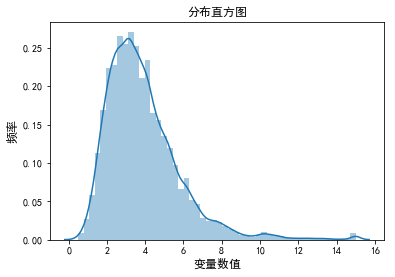

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

fig, ax = plt.subplots()
sns.distplot(X[:,0], hist = True, kde=True) # 以第一个变量为例
ax.set_title('分布直方图', fontsize=12)
ax.set_xlabel('变量数值', fontsize=12)
ax.set_ylabel('频率', fontsize=12); # 这个变量为长尾分布

In [3]:
from sklearn.preprocessing import Binarizer

sample_columns = X[0:10,0] # 选择前十个样本
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

model = Binarizer(threshold=6) # 不妨将6设为阈值
# 若数值 <= 6, 则返回 0， 否则返回 1
result = model.fit_transform(sample_columns.reshape(-1,1)).reshape(-1)
# 返回 array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

#### Binning 分箱

将数值特征分箱离散化

##### 等距分箱

In [4]:
from sklearn.preprocessing import KBinsDiscretizer

# 为了模拟数据科学家的实际操作，我们将
# 在训练集上训练 KBinsDiscretizer然后转换测试集
# 将第一列中的前十个样本作为测试集
# 将第一列中的其余样本作为训练集

test_set = X[0:10,0]
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])
train_set = X[10:,0]

model = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform') # 设置5个箱

model.fit(train_set.reshape(-1,1)) # 在训练集上训练
transformed_train = model.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
transformed_test = model.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# 返回测试集的箱序数： transformed_test = array([2., 2., 2., 1., 1., 1., 1., 0., 0., 1.])
bin_edge = model.bin_edges_[0]
# 返回分箱区别 array([ 0.4999 ,  3.39994,  6.29998,  9.20002, 12.10006, 15.0001 ])

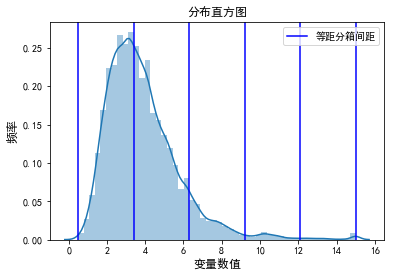

In [5]:
# 可视化分箱
fig, ax = plt.subplots()
sns.distplot(train_set, hist = True, kde=True)

for edge in bin_edge: # 等距
    line = plt.axvline(edge, color='b')
ax.legend([line], ['等距分箱间距'], fontsize=10)
ax.set_title('分布直方图', fontsize=12)
ax.set_xlabel('变量数值', fontsize=12)
ax.set_ylabel('频率', fontsize=12); 

##### 分位数分箱

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

# 为了模拟数据科学家的实际操作，我们将
# 在训练集上训练 KBinsDiscretizer然后转换测试集
# 将第一列中的前十个样本作为测试集
# 将第一列中的其余样本作为训练集

test_set = X[0:10,0]
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])
train_set = X[10:,0]

model = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') # 设置5个箱，基于分位数分箱

model.fit(train_set.reshape(-1,1))
transformed_train = model.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
transformed_test = model.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# 返回测试集分箱序数结果 array([4., 4., 4., 4., 2., 3., 2., 1., 0., 2.])
bin_edge = model.bin_edges_[0]
# 返回分箱区间 transformed_test = array([ 0.4999 ,  2.3523 ,  3.1406 ,  3.9667 ,  5.10824, 15.0001 ])
# 2.3523 是 20% 分位数
# 3.1406 是 40% 分位数, etc..

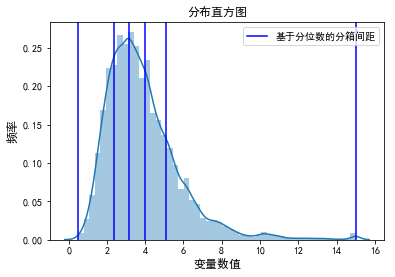

In [7]:
# 可视化分箱
fig, ax = plt.subplots()
sns.distplot(train_set, hist = True, kde=True)

for edge in bin_edge: # quantile based bins
    line = plt.axvline(edge, color='b')
ax.legend([line], ['基于分位数的分箱间距'], fontsize=10)
ax.set_title('分布直方图', fontsize=12)
ax.set_xlabel('变量数值', fontsize=12)
ax.set_ylabel('频率', fontsize=12); 

### Scaling 缩放

在线性回归，逻辑回归等线性模型中，不同尺度的特征之间难以比较。在基于欧氏距离的 k-means 聚类或 KNN 模型中，特征的不同尺度也会影响到距离测算。缩放可以有效的解决以上的问题，让变量之间可比性增强。而对于基于梯度下降的算法，数据缩放也会有效的特征运行速度。

**一些常用模型的分类**
  
|模型名称 | 是否需要缩放 |
|--|--|
| 向量支持机, K最近邻算法, 主成分分析, K均值聚类, 线性回归, 逻辑回归, 线性判别分析| $\checkmark$ |
| 朴素贝叶斯, 基于树的机器学习算法 | $\times$ |

* 注：偏度影响也会PCA 模型，因此有些人推荐使用幂变换来消除偏度。

#### Stardard Scaling 标准缩放（Z 分数标准化）

公式: ${X}' = \frac{X - \mu }{\sigma}$  
$\mu$ 是X的均值， $\sigma$ 是X的标准差  
这种缩放方法对异常值较敏感，异常值会同时影响$\mu$ 和 $\sigma$

In [8]:
from sklearn.preprocessing import StandardScaler

# 为了模拟数据科学家的实际操作，我们将
# 在训练集上训练 StandardScaler然后转换测试集
# 将第一列中的前十个样本作为测试集
# 将第一列中的其余样本作为训练集

test_set = X[0:10,0]
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])
train_set = X[10:,0]

model = StandardScaler()

model.fit(train_set.reshape(-1,1)) # 在训练集上训练
# 转换训练集与测试集
transformed_train = model.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
transformed_test = model.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# 返回测试集的缩放结果 transformed_test = array([ 2.34539745,  2.33286782,  1.78324852,  0.93339178, -0.0125957 ,
# 0.08774668, -0.11109548, -0.39490751, -0.94221041, -0.09419626])
# 返回结果与以下代码的返回结果一致 ((X[0:10,0] - X[10:,0].mean())/X[10:,0].std())

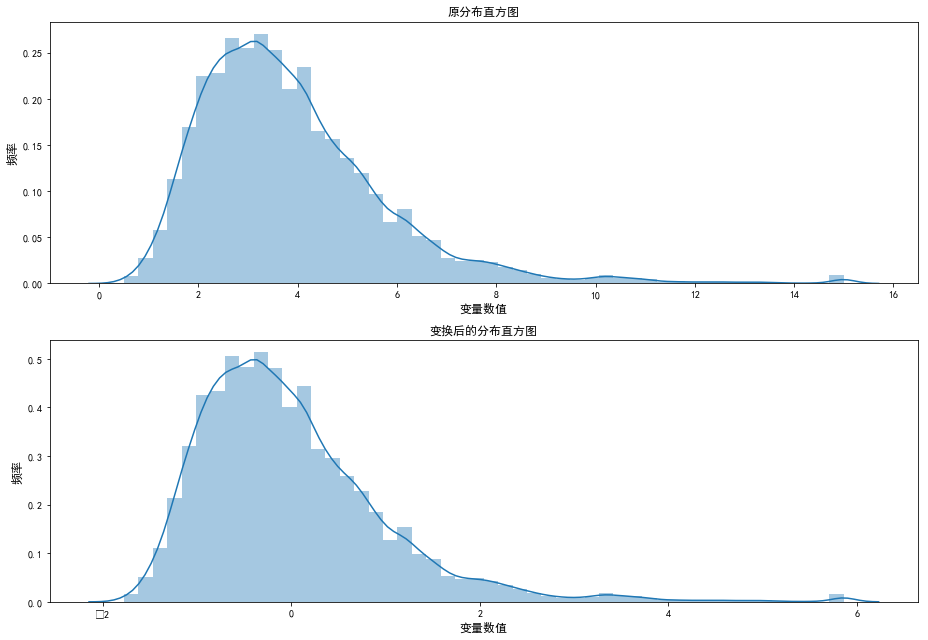

In [9]:
# 可视化缩放前后的分布对比
# 在整个变量上操作（不分训练集与测试集）

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('原分布直方图', fontsize=12)
ax[0].set_xlabel('变量数值', fontsize=12)
ax[0].set_ylabel('频率', fontsize=12); # 这个变量为长尾分布

model = StandardScaler()
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# 可视化整个变量上缩放的结果
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('变换后的分布直方图', fontsize=12)
ax[1].set_xlabel('变量数值', fontsize=12)
ax[1].set_ylabel('频率', fontsize=12); # 分布一致，但是变量的尺度已发生变化
fig.tight_layout()

#### MinMaxScaler 最大最小缩放 (按数值范围缩放)

假设我们想要将特征数值缩放到 (a, b)区间  
公式：${X}' = \frac{X - Min }{Max - Min} * (b - a) + a$   
$Min$ 是X中的最小值， $Max$ 是X中的最大值  
这种缩放方法同样对异常值较敏感，异常值会同时影响$Min$ 和 $Max$

In [10]:
from sklearn.preprocessing import MinMaxScaler

# 为了模拟数据科学家的实际操作，我们将
# 在训练集上训练 MinMaxScaler然后转换测试集
# 将第一列中的前十个样本作为测试集
# 将第一列中的其余样本作为训练集

test_set = X[0:10,0]
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])
train_set = X[10:,0]

model = MinMaxScaler(feature_range=(0,1)) # 将缩放区间定为 (0,1)

model.fit(train_set.reshape(-1,1)) # 在训练集上训练
# 转换缩放训练集与测试集
transformed_train = model.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
transformed_test = model.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# transformed_test = array([0.53966842, 0.53802706, 0.46602805, 0.35469856, 0.23077613,
# 0.24392077, 0.21787286, 0.18069406, 0.1089985 , 0.22008662])
# 返回结果与以下代码的返回结果一致： (X[0:10,0] - X[10:,0].min())/(X[10:,0].max()-X[10:,0].min())

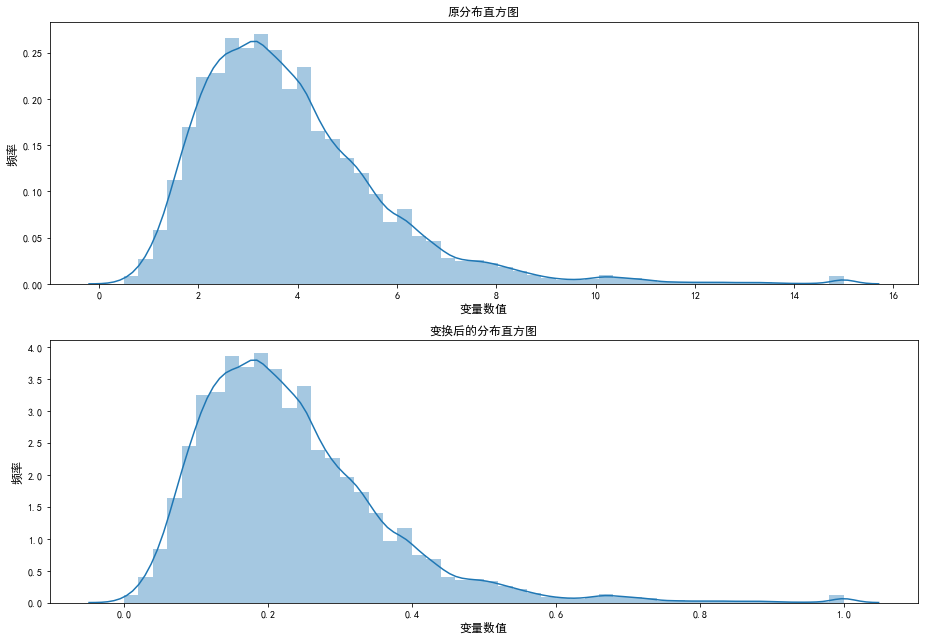

In [11]:
# 可视化缩放前后的分布对比
# 在整个变量上操作（不分训练集与测试集）

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('原分布直方图', fontsize=12)
ax[0].set_xlabel('变量数值', fontsize=12)
ax[0].set_ylabel('频率', fontsize=12); # 这个变量为长尾分布

model = MinMaxScaler(feature_range=(0,1))
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# 可视化整个变量上缩放的结果
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('变换后的分布直方图', fontsize=12)
ax[1].set_xlabel('变量数值', fontsize=12)
ax[1].set_ylabel('频率', fontsize=12); # 分布一致，但是变量的尺度已发生变化
fig.tight_layout() # 现变量分布于（0，1）区间

#### RobustScaler 稳健缩放 (抗异常值缩放)

使用对异常值稳健的统计（分位数）来缩放特征   
假设我们要将缩放的特征分位数范围为 (a, b)  
公式：${X}' = \frac{X - Median}{X.quantile(b) - X.quantile(a)}$   
这种方法对异常点鲁棒性更强

In [12]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# 为了模拟数据科学家的实际操作，我们将
# 在训练集上训练 RobustScaler然后转换测试集
# 将第一列中的前十个样本作为测试集
# 将第一列中的其余样本作为训练集

test_set = X[0:10,0]
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])
train_set = X[10:,0]

model = RobustScaler(with_centering = True, with_scaling = True, 
                    quantile_range = (25.0, 75.0))
# with_centering = True => 中心归零，变量X将会变为：X - X.median()
# with_centering = True => 数值标准化，变量X将会除以变量分位数区间（区间由用户设定）

# 不妨将变量分位数区间设置为(25%, 75%)

model.fit(train_set.reshape(-1,1)) # 在训练集上训练
# 转换缩放训练集与测试集
transformed_train = model.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
transformed_test = model.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# transformed_test =  array([ 2.19755974,  2.18664281,  1.7077657 ,  0.96729508,  0.14306683,
# 0.23049401,  0.05724508, -0.19003715, -0.66689601,  0.07196918])
# 返回结果与以下代码的返回结果一致： (X[0:10,0] - np.quantile(X[10:,0], 0.5))/(np.quantile(X[10:,0],0.75)-np.quantile(X[10:,0], 0.25))

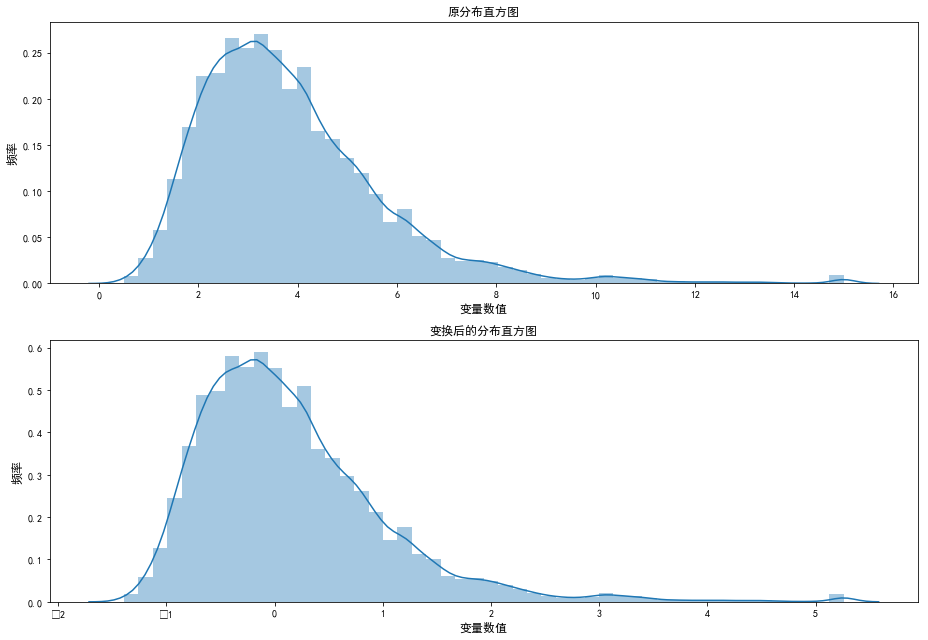

In [13]:
# 可视化缩放前后的分布对比
# 在整个变量上操作（不分训练集与测试集）

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('原分布直方图', fontsize=12)
ax[0].set_xlabel('变量数值', fontsize=12)
ax[0].set_ylabel('频率', fontsize=12); # 这个变量为长尾分布

model = RobustScaler(with_centering = True, with_scaling = True, 
                    quantile_range = (25.0, 75.0))
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# 可视化整个变量上缩放的结果
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('变换后的分布直方图', fontsize=12)
ax[1].set_xlabel('变量数值', fontsize=12)
ax[1].set_ylabel('频率', fontsize=12); # 分布一致，但是变量的尺度已发生变化
fig.tight_layout() 

#### Power Transform 幂次变换 (非线性变换)

以上介绍的所有缩放方法都保持原来的分布。但正态性是许多统计模型的一个重要假设。我们可以使用幂次变换将原始分布转换为正态分布。

##### Box-Cox 变换

Box-Cox 变换只适用于正数，并假设如下分布：  
$x_i(\lambda) = \left\{\begin{matrix}
 \frac{x_i^\lambda - 1}{\lambda}& if \lambda \neq 0\\ 
 log(\lambda)& if \lambda =  0
\end{matrix}\right.$  
考虑了所有的 λ 值，通过最大似然估计选择稳定方差和最小化偏度的最优值。

In [14]:
from sklearn.preprocessing import PowerTransformer

# 为了模拟数据科学家的实际操作，我们将
# 在训练集上训练 PowerTransformer 然后转换测试集
# 将第一列中的前十个样本作为测试集
# 将第一列中的其余样本作为训练集

test_set = X[0:10,0]
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])
train_set = X[10:,0]

model = PowerTransformer(method='box-cox', standardize=True)
# 使用 box-cox 变换

model.fit(train_set.reshape(-1,1)) # 在训练集上训练
# 转换缩放训练集与测试集
transformed_train = model.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
transformed_test = model.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# transformed_test = array([ 1.91669292,  1.91009687,  1.60235867,  1.0363095 ,  0.19831579,
# 0.30244247,  0.09143411, -0.24694006, -1.08558469,  0.11011933])

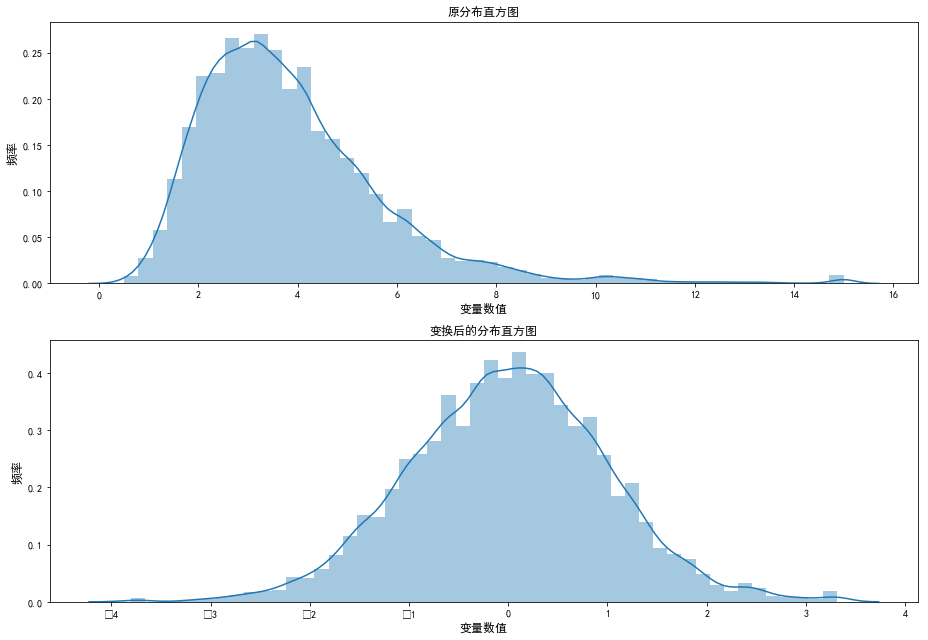

In [15]:
# 可视化缩放前后的分布对比
# 在整个变量上操作（不分训练集与测试集）

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('原分布直方图', fontsize=12)
ax[0].set_xlabel('变量数值', fontsize=12)
ax[0].set_ylabel('频率', fontsize=12); # 这个变量为长尾分布

model = PowerTransformer(method='box-cox', standardize=True)
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# 可视化整个变量上缩放的结果
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('变换后的分布直方图', fontsize=12)
ax[1].set_xlabel('变量数值', fontsize=12)
ax[1].set_ylabel('频率', fontsize=12); # 分布变为正态分布
fig.tight_layout() 

##### Yeo-Johnson 变换

Yeo Johnson 变换适用于正数和负数，并假设以下分布：  
$x_i(\lambda) = \left\{\begin{matrix}
\frac{[(x_i + 1)^{\lambda} -1]}{\lambda} & if \, \, \lambda\neq 0, x_i \geq  0 \\ 
ln(x_i + 1) & if \, \, \lambda =  0, x_i \geq  0\\ 
-\frac{[(-x_i + 1)^{2- \lambda} -1]}{2-\lambda} & if \, \, \lambda\neq 2, x_i <  0 \\ 
-ln(-x_i + 1) & if \, \, \lambda =  2, x_i <  0\\ 
\end{matrix}\right.$  
考虑了所有的 λ 值，通过最大似然估计选择稳定方差和最小化偏度的最优值

In [16]:
from sklearn.preprocessing import PowerTransformer

# 为了模拟数据科学家的实际操作，我们将
# 在训练集上训练 PowerTransformer 然后转换测试集
# 将第一列中的前十个样本作为测试集
# 将第一列中的其余样本作为训练集

test_set = X[0:10,0]
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])
train_set = X[10:,0]

model = PowerTransformer(method='yeo-johnson', standardize=True)
# 使用 yeo-johnson 变换

model.fit(train_set.reshape(-1,1)) # 在训练集上测试
# 转换缩放训练集与测试集
transformed_train = model.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
transformed_test = model.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# transformed_test =  array([ 1.90367888,  1.89747091,  1.604735  ,  1.05166306,  0.20617221,
# 0.31245176,  0.09685566, -0.25011726, -1.10512438,  0.11598074])

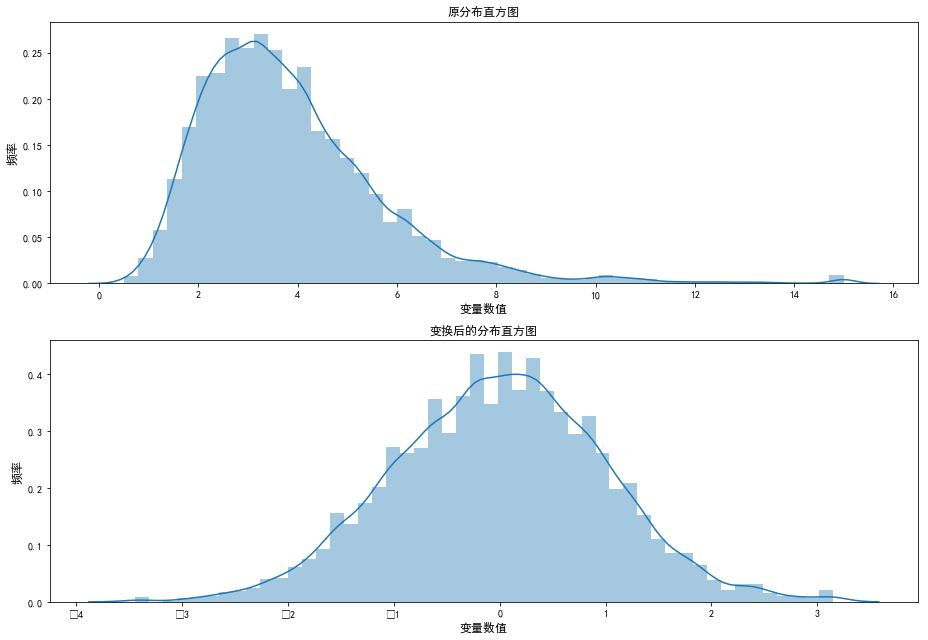

In [17]:
# 可视化缩放前后的分布对比
# 在整个变量上操作（不分训练集与测试集）

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (13,9))
sns.distplot(X[:,0], hist = True, kde=True, ax=ax[0])
ax[0].set_title('原分布直方图', fontsize=12)
ax[0].set_xlabel('变量数值', fontsize=12)
ax[0].set_ylabel('频率', fontsize=12); # 这个变量为长尾分布

model = PowerTransformer(method='yeo-johnson', standardize=True)
model.fit(X[:,0].reshape(-1,1)) 
result = model.transform(X[:,0].reshape(-1,1)).reshape(-1)

# 可视化整个变量上缩放的结果
sns.distplot(result, hist = True, kde=True, ax=ax[1])
ax[1].set_title('变换后的分布直方图', fontsize=12)
ax[1].set_xlabel('变量数值', fontsize=12)
ax[1].set_ylabel('频率', fontsize=12); # 分布变为正态分布
fig.tight_layout() 

### Normalization 正则化

以上所有缩放方法均为列操作。但正则化为行操作，它试图“缩放”每个样本，使其具有单位范数。由于正则化在每一行都独立起作用，它会扭曲特征之间的关系，因此较为不常见。但是正则化方法在文本分类和上下文聚类中是非常有效的。

假设 X[i][j] 表示样本 i 中特征 j 的值  
L1 正则化公式：: $X[i][j] = \frac{X[i][j]}{\sum_{j=1|X[i][j]|}}$  
L2 正则化公式：: $X[i][j] = \frac{X[i][j]}{\sqrt{\sum_{j=1}X[i][j]^2}}$  

##### L1 正则化

In [18]:
from sklearn.preprocessing import Normalizer

# Normalizer对每一行独立执行操作
# 因此，其无需训练 （但是在scikit-learn中，为了保持与其他模块的一致，此处仍需使用fit方法，但是对结果无影响）

###### 使用 L1 正则化
sample_columns = X[0:2,0:3] # 选择前三个变量的前两个样本作为范例
# 返回 array([[ 8.3252, 41., 6.98412698],
# [ 8.3014 , 21.,  6.23813708]])

model = Normalizer(norm='l1')

model.fit(sample_columns) 

result = model.transform(sample_columns) # 因Normalizer与训练集测试集无关，故此处我们不做训练集划分
# 返回 array([[0.14784762, 0.72812094, 0.12403144],
# [0.23358211, 0.59089121, 0.17552668]])
# 返回结果与以下代码的返回结果一致
# sample_columns/np.sum(np.abs(sample_columns), axis=1).reshape(-1,1)

##### L2 正则化

In [19]:
from sklearn.preprocessing import Normalizer

# Normalizer对每一行独立执行操作
# 因此，其无需训练 （但是在scikit-learn中，为了保持与其他模块的一致，此处仍需使用fit方法，但是对结果无影响）

###### 使用 L2 正则化
sample_columns = X[0:2,0:3] # 选择前三个变量的前两个样本作为范例
# 返回 array([[ 8.3252, 41., 6.98412698],
# [ 8.3014 , 21.,  6.23813708]])

model = Normalizer(norm='l2')

model.fit(sample_columns) 

result = model.transform(sample_columns) # 因Normalizer与训练集测试集无关，故此处我们不做训练集划分
# 返回 array([[0.19627663, 0.96662445, 0.16465922],
# [0.35435076, 0.89639892, 0.26627902]])
# 返回结果与以下代码的返回结果一致
# sample_columns/np.sqrt(np.sum(sample_columns**2, axis=1)).reshape(-1,1)

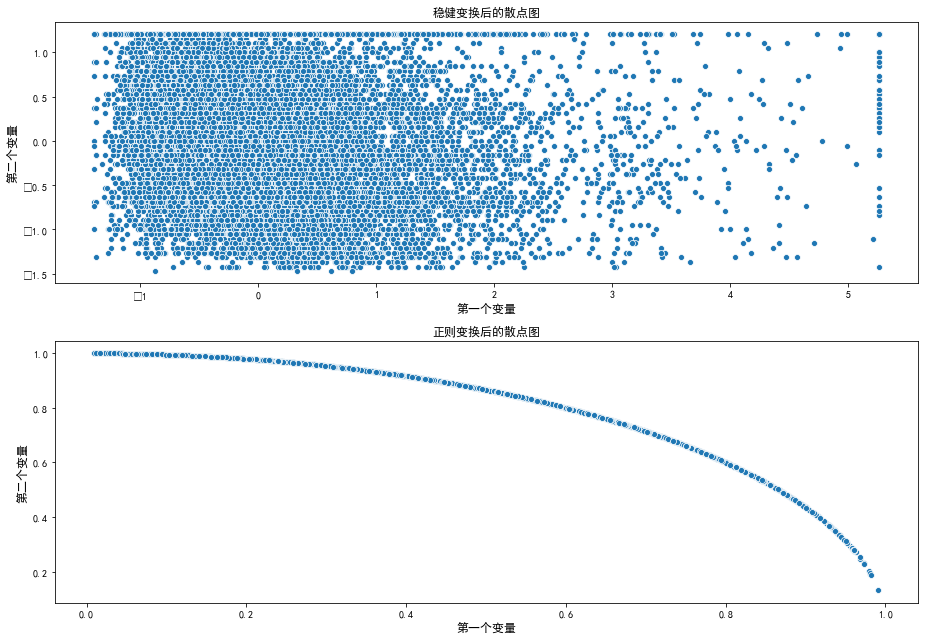

In [20]:
# 可视化正则化之后的分布变化
# 将其与稳健缩放做对比
# 在整个变量上操作（不分训练集与测试集）

import seaborn as sns
import matplotlib.pyplot as plt

# RobustScaler
fig, ax = plt.subplots(2,1, figsize = (13,9))

model = RobustScaler(with_centering = True, with_scaling = True, 
                    quantile_range = (25.0, 75.0))
model.fit(X[:,0:2]) 
result = model.transform(X[:,0:2])

sns.scatterplot(result[:,0], result[:,1], ax=ax[0]) # 选取第一个和第二个变量作为范例
ax[0].set_title('稳健变换后的散点图', fontsize=12)
ax[0].set_xlabel('第一个变量', fontsize=12)
ax[0].set_ylabel('第二个变量', fontsize=12);

model = Normalizer(norm='l2') # 使用l2范数

model.fit(X[:,0:2]) 
result = model.transform(X[:,0:2])

sns.scatterplot(result[:,0], result[:,1], ax=ax[1])
ax[1].set_title('正则变换后的散点图', fontsize=12)
ax[1].set_xlabel('第一个变量', fontsize=12)
ax[1].set_ylabel('第二个变量', fontsize=12);
fig.tight_layout()  # 正则化会扭曲原数据中的变量关系

### Imputation of missing values 缺失值填补

在实际操作中，数据集中可能存在缺失值。然而，这种稀疏的数据集与大多数 scikit-learn的模型不兼容，scikit-learn的模型假设所有特征都是数值的，且没有丢失值。所以在应用 scikit-learn 的模型之前，我们需要估算缺失的值  

但是一些新的模型，比如在其他包中实现的 XGboost、LightGBM 和 Catboost，均为数据集中丢失的值提供了支持。所以在应用这些模型时，我们不再需要填充数据集中丢失的值

#### Univariate feature imputation 单变量特征插补

假设第 i 列中有缺失值，那么我们将用常数或第 i 列的统计数据（平均值、中值或众数）对其进行估算

In [21]:
from sklearn.impute import SimpleImputer

test_set = X[0:10,0].copy() # 选择前十个变量作为测试集，无缺失值
# 返回 array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

# 手动生成缺失值
test_set[3] = np.nan
test_set[6] = np.nan
# 现在测试集变成如下： 
# array([8.3252, 8.3014, 7.2574,    nan, 3.8462, 4.0368,    nan, 3.12 ,2.0804, 3.6912])

# 生成训练集，选择其余的样本作为训练集并手动生成缺失值
train_set = X[10:,0].copy()
train_set[3] = np.nan
train_set[6] = np.nan

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # 使用样本均值来填补缺失值
# 其余的填补方法： 'mean', 'median', 'most_frequent', 'constant'
imputer.fit(train_set.reshape(-1,1)) # 在训练集上训练
# 转换填补训练集与测试集
imputed_train = imputer.transform(train_set.reshape(-1,1)).reshape(-1) # 转换训练集
imputed_test = imputer.transform(test_set.reshape(-1,1)).reshape(-1) # 转换测试集

# 以测试集结果为例：
# imputed_test =  array([8.3252    , 8.3014    , 7.2574    , 3.87023658, 3.8462    ,
# 4.0368    , 3.87023658, 3.12      , 2.0804    , 3.6912    ])
# 所有的缺失值将会被 3.87023658填补
# 3.87023658 = np.nanmean(train_set) 
# 3.87023658 恰恰是训练集中除去缺失值后的均值

#### Multivariate feature imputation 多元特征插补

多元特征插补利用整个数据集的信息来估计和插补缺失值。在 scikit-learn 中，它以循环迭代的方式实现。

在每一步中，一个包含缺失值的特征列被指定为输出 y，其他特征列被视为输入 X。一个回归器在X上被训练然后用以预测y中的缺失值。这是以迭代的方式对每个特征进行，直到达到最大迭代次数限制。

##### 使用线性模型（以 BayesianRidge 为例）

In [22]:
from sklearn.experimental import enable_iterative_imputer # 在现有版本下0.22，必须激活这个函数才可以使用IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

test_set = X[0:10,:].copy() # 无缺失值，选择所有变量的前十个样本作为测试集
# 第一个变量为
# array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

# 手动生成一些缺失值
test_set[3,0] = np.nan
test_set[6,0] = np.nan
test_set[3,1] = np.nan
# 现在第一个变量将变为
# array([8.3252, 8.3014, 7.2574,    nan, 3.8462, 4.0368,    nan, 3.12 ,2.0804, 3.6912])

# 生成训练集，选择其余的样本作为训练集并手动生成缺失值
train_set = X[10:,:].copy()
train_set[3,0] = np.nan
train_set[6,0] = np.nan
train_set[3,1] = np.nan

impute_estimator = BayesianRidge()
imputer = IterativeImputer(max_iter = 10, 
                           random_state = 0, 
                           estimator = impute_estimator)

imputer.fit(train_set) # 在训练集上训练

# 转换填补训练集与测试集
imputed_train = imputer.transform(train_set) # 转换训练集
imputed_test = imputer.transform(test_set)# 转换测试集

result = imputer.transform(test_set)[:,0] # 仅选择第一个变量来展示结果
# result =  array([8.3252    , 8.3014    , 7.2574    , 4.6237195 , 3.8462    ,
# 4.0368    , 4.00258149, 3.12      , 2.0804    , 3.6912    ]) # 可见缺失值已被填补

##### 使用基于树的模型（以 ExtraTrees 为例）：

In [23]:
from sklearn.experimental import enable_iterative_imputer # 在现有版本下0.22，必须激活这个函数才可以使用IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

test_set = X[0:10,:].copy() # 无缺失值，选择所有变量的前十个样本作为测试集
# 第一个变量为
# array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

# 手动生成一些缺失值
test_set[3,0] = np.nan
test_set[6,0] = np.nan
test_set[3,1] = np.nan
# 现在第一个变量将变为
# array([8.3252, 8.3014, 7.2574,    nan, 3.8462, 4.0368,    nan, 3.12 ,2.0804, 3.6912])

# 生成训练集，选择其余的样本作为训练集并手动生成缺失值
train_set = X[10:,:].copy()
train_set[3,0] = np.nan
train_set[6,0] = np.nan
train_set[3,1] = np.nan

impute_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
imputer = IterativeImputer(max_iter = 10, 
                           random_state = 0, 
                           estimator = impute_estimator)

imputer.fit(train_set) # 在训练集上训练

# 转换填补训练集与测试集
imputed_train = imputer.transform(train_set) # 转换训练集
imputed_test = imputer.transform(test_set)# 转换测试集

result = imputer.transform(test_set)[:,0] # 仅选择第一个变量来展示结果
# result =  array([8.3252 , 8.3014 , 7.2574 , 4.63813, 3.8462 , 4.0368 , 3.24721,
# 3.12   , 2.0804 , 3.6912 ]) # 可见缺失值已被填补

##### 使用 K 近邻（KNN）：

In [24]:
from sklearn.experimental import enable_iterative_imputer # 在现有版本下0.22，必须激活这个函数才可以使用IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

test_set = X[0:10,:].copy() # 无缺失值，选择所有变量的前十个样本作为测试集
# 第一个变量为
# array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912])

# 手动生成一些缺失值
test_set[3,0] = np.nan
test_set[6,0] = np.nan
test_set[3,1] = np.nan
# 现在第一个变量将变为
# array([8.3252, 8.3014, 7.2574,    nan, 3.8462, 4.0368,    nan, 3.12 ,2.0804, 3.6912])

# 生成训练集，选择其余的样本作为训练集并手动生成缺失值
train_set = X[10:,:].copy()
train_set[3,0] = np.nan
train_set[6,0] = np.nan
train_set[3,1] = np.nan

impute_estimator = KNeighborsRegressor(n_neighbors=10, 
                                       p = 1)  # 设置 p=1 使用曼哈顿距离
# 相比于平方差距离，曼哈顿距离对异常值没有那么敏感

imputer = IterativeImputer(max_iter = 10, 
                           random_state = 0, 
                           estimator = impute_estimator)

imputer.fit(train_set) # 在训练集上训练

# 转换填补训练集与测试集
imputed_train = imputer.transform(train_set) # 转换训练集
imputed_test = imputer.transform(test_set)# 转换测试集

result = imputer.transform(test_set)[:,0] # 仅选择第一个变量来展示结果
# result =  array([8.3252, 8.3014, 7.2574, 3.6978, 3.8462, 4.0368, 4.052 , 3.12  ,
# 2.0804, 3.6912]) # 可见缺失值已被填补

#### Marking imputed values 标记估算值

有时，数据缺失这一信息可能是有用的。因此，scikit learn 还提供了将包含缺失值的数据集转换为相应的二进制矩阵的功能，该矩阵指示数据集中缺失值的存在位置

In [25]:
from sklearn.impute import MissingIndicator

# 此标记与训练集测试集的划分无关，故仅以训练集作为例子

train_set = X[10:,:].copy() # 选择全部的变量
train_set[3,0] = np.nan # 手动生成数据缺失值
train_set[6,0] = np.nan
train_set[3,1] = np.nan

indicator = MissingIndicator(missing_values=np.nan, features='all') 
# 标记训练集中的缺失值
result = indicator.fit_transform(train_set) # result和训练集的形状一致
# result中仅包含布尔值

result[:,0].sum() # 等于2， 因为第一个变量中仅有两个缺失值
result[:,1].sum(); # 等于 1, 因为第二个变量中有一个缺失值

### Feature Transformation 特征变换

#### Polynomial Transformation 多项式变换

有时我们希望在模型中引入非线性特征，从而增加模型的复杂度。对于简单的线性模型而言，这将大大增加模型的复杂度  
但是对于更复杂的模型，如基于树的机器学习模型，它们已经在非参数的模型结构中包含了非线性关系。因此，这种特性转换可能对基于树的机器学习模型没有太大帮助。

例如，如果我们将阶数设置为 3，则多项式变换的最终形式如下  
 $(X_1, X_2) => (1, X_1, X_2, X_1^2, X_1X_2, X_2^2, X_1^3, X_1^2X_2, X_1X_2^2, X_2^3)$

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# 手工合成训练集与测试集
train_set = np.array([2,3]).reshape(1,-1) # 形状为 (1,2)
# train_set =  array([[2, 3]])

test_set = np.array([4,3]).reshape(1,-1)
# test_set = array([[4, 3]])

poly = PolynomialFeatures(degree = 3, interaction_only = False)
# 设置最高复杂度为3, 并且设置interaction_only=False，即我们需要的不仅仅是交叉项

transformed_train = poly.fit_transform(train_set) # 形状 (1, 10)
transformed_test = poly.fit_transform(test_set) # 形状 (1, 10)

# 以训练集变换结果为例：
# transformed_train = array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])
# 结果与前文的叙述一致

#### Custom Transformation 自定义变换

In [27]:
from sklearn.preprocessing import FunctionTransformer

# 手工合成训练集与测试集
train_set = np.array([2,3]).reshape(1,-1) # 形状为 (1,2)
# train_set =  array([[2, 3]])

test_set = np.array([4,3]).reshape(1,-1)
# test_set = array([[4, 3]])

transformer = FunctionTransformer(func = np.log1p, validate=True)
# 使用 log 变换, X' = log(1 + x)
# func 还可以为其他 numpy 方程，例如 numpy.exp

transfromed_train = transformer.transform(train_set) # 形状为 (1,2)
transfromed_test = transformer.transform(test_set) # 形状为 (1,2)

# 以训练集结果为例
# transfromed_train =  array([[1.09861229, 1.38629436]]), 与 np.log1p(train_set) 结果一致

## Static Categorical Variables 静态类别变量

真实世界的数据集还往往包含类别特征。但是由于scikit-learn中的模型只能处理数值特征，因此我们需要将类别特征编码为数值特征  

但是，很多新的模型开始直接提供类别变量支持，例如lightGBM和Catboost。

这里我们使用category_encoders包，因为它涵盖了更多的编码方法。

### Ordinal Encoding 序数编码

序数编码将类别变量转化为一列序数变量，包含从1到类别数量之间的整数

In [28]:
import numpy as np
import pandas as pd
from category_encoders import OrdinalEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [29]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [30]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [31]:
encoder = OrdinalEncoder(cols = ['Sex', 'Type'], 
                         handle_unknown = 'value', 
                         handle_missing = 'value').fit(train_set,train_y) # 在训练集上训练
# 将 handle_unknown设为‘value’，即测试集中的未知特征值将被标记为-1
# 将 handle_missing设为‘value’，即测试集中的缺失值将被标记为-2
# 其他的选择为：‘error’：即报错； ‘return_nan’：即未知值/缺失之被标记为nan 
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# 以测试集结果为例
encoded_test

# 在序数编码中： 
  
# 变量Sex中: 'male' => 1.0, 'female' => 2.0, 未知 => -1.0, 缺失值 => -2.0
# （事实上，测试集中完全有可能出现未知与缺失情况）
# 在我们的例子中, Sex这一变量中的'other' 类别从未在训练集中出现过
  
# 变量 Type 中: 10 => 1.0, 20 => 2.0, 15 => 3.0, 未知 => -1.0, 缺失值 => -2.0

,Sex,Type
0,2.0,2.0
1,1.0,2.0
2,-1.0,3.0
3,1.0,2.0
4,2.0,-2.0
5,1.0,-1.0


In [32]:
encoded_train.astype(float) # 训练集结果

,Sex,Type
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,2.0,2.0
4,2.0,3.0


### One-hot Encoding 独热编码

Scikit-learn中也提供来独热编码函数，其可以将具有n_categories个可能值的一个分类特征转换为n_categories个二进制特征，其中一个为1，所有其他为0

在category_encoders中，它包含了附加功能，即指示缺失或未知的值。在这里，我们继续使用category_encoders

In [33]:
import numpy as np
import pandas as pd
from category_encoders import OneHotEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [34]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [35]:
test_set  # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [36]:
encoder = OneHotEncoder(cols=['Sex', 'Type'], 
                        handle_unknown='indicator', 
                        handle_missing='indicator', 
                        use_cat_names=True).fit(train_set,train_y) # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集
# 将 handle_unknown设为‘indicator’，即会新增一列指示未知特征值
# 将 handle_missing设为‘indicator’，即会新增一列指示缺失值
# 其他的handle_unknown/handle_missing 的选择为：
# ‘error’：即报错; ‘return_nan’：即未知值/缺失之被标记为nan; ‘value’：即未知值/缺失之被标记为0

# 以测试集结果为例
encoded_test

# 在独热编码中： 
  
# 变量 Sex => 变为了4个新变量: 'male' => [1 ,0 ,0, 0];
#                           'female' => [0 ,1 ,0, 0];
#                           未知 =>  [0 ,0 ,0, 1];
#                           缺失 => [0, 0, 1, 0];
    
# 变量 Type => 变为了5个新变量: 10 => [1, 0, 0, 0, 0];
#                            20 => [0, 1, 0, 0, 0];, 
#                            15 => [0, 0, 1, 0, 0];
#                            未知 => [0, 0, 0, 0, 1];
#                            缺失 => [0, 0, 0, 1, 0];  

,Sex_male,Sex_female,Sex_nan,Sex_-1,Type_10,Type_20,Type_15,Type_nan,Type_-1
0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,1


### Hashing Encoding 哈希编码

哈希编码基于特征哈希的方法。它将哈希函数应用于变量，将任意数量的变量以一定的规则映射到给定数量的变量。特征哈希可能会导致要素之间发生冲突。但哈希编码的优点是它不需要制定和维护原变量与新变量之间的映射关系。因此，哈希编码器的大小及复杂程度不随数据类别的增多而增多。

In [37]:
import numpy as np
import pandas as pd
from category_encoders.hashing import HashingEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [38]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [39]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [40]:
encoder = HashingEncoder(cols=['Sex', 'Type'],  
                         n_components = 5).fit(train_set,train_y)
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# 将两列的数据集哈希编码为5列
# 哈希编码结果与训练集/测试集中的内容无关
# 只要列名匹配，我们就可以在任何新数据集上使用哈希编码方法
# 编码结果仅由哈希函数确定

# 通常哈希编码应用于更高和更稀疏的维空间，这里以两个变量作为哈希编码的例子
# 以测试集结果为例
encoded_test

,col_0,col_1,col_2,col_3,col_4
0,1,1,0,0,0
1,0,1,0,0,1
2,0,0,0,2,0
3,0,1,0,0,1
4,1,0,1,0,0
5,0,0,0,0,2


In [41]:
encoded_train # 训练集结果

,col_0,col_1,col_2,col_3,col_4
0,0,0,0,0,2
1,1,1,0,0,0
2,0,0,0,0,2
3,1,1,0,0,0
4,1,0,0,1,0


### Helmert Encoding Helmert 编码

Helmert编码通常在计量经济学中使用。在Helmert编码（分类特征中的每个值对应于Helmert矩阵中的一行）之后，线性模型中编码后的变量系数可以反映在给定该类别变量某一类别值的情形下因变量的平均值与给定该类别其他类别值的情形下因变量的平均值的差值。在category_encoders包中实现的Helmert编码为反向Helmert编码。更多信息[link](https://www.statsmodels.org/devel/contrasts.html)。

In [42]:
import numpy as np
import pandas as pd
from category_encoders import HelmertEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [43]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [44]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [45]:
encoder = HelmertEncoder(cols=['Sex', 'Type'], 
                         handle_unknown='indicator', 
                         handle_missing='indicator').fit(train_set,train_y) # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集
# 将 handle_unknown设为‘indicator’，即会新增一列指示未知特征值
# 将 handle_missing设为‘indicator’，即会新增一列指示缺失值
# 其他的handle_unknown/handle_missing 的选择为：
# ‘error’：即报错; ‘return_nan’：即未知值/缺失之被标记为nan; ‘value’：即未知值/缺失之被标记为0

# 以测试集结果为例
encoded_test

# 在Helmert编码中： 
  
# 变量 Sex => 变为了4个新变量（包含常数项）: 'male' => [ 1. -1. -1. -1.];
#                                      'female' => [ 1.  1. -1. -1.];
#                                      未知 =>  [ 1.  0.  0.  3.];
#                                      缺失 => [ 1.  0.  2. -1.];
    
# 变量 Type => 变为了5个新变量（包含常数项）: 10 => [ 1. -1. -1. -1. -1.];
#                                        20 => [ 1.  1. -1. -1. -1.];, 
#                                        15 => [ 1.  0.  2. -1. -1.];
#                                        未知 =>  [ 1.  0.  0.  0.  4.];
#                                        缺失 => [ 1.  0.  0.  3. -1.];  

,intercept,Sex_0,Sex_1,Sex_2,Type_0,Type_1,Type_2,Type_3
0,1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
1,1,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,1,0.0,0.0,3.0,0.0,2.0,-1.0,-1.0
3,1,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1,1.0,-1.0,-1.0,0.0,0.0,3.0,-1.0
5,1,-1.0,-1.0,-1.0,0.0,0.0,0.0,4.0


In [46]:
# 可以通过如下代码计算变量Type的Helmert 矩阵

from patsy.contrasts import Helmert
levels = [1,2,3,4,5] # 3个变量值 + 1个未知值 + 1个缺失值
contrast = Helmert().code_with_intercept(levels)
print(contrast.matrix) # 第一列为常数项

[[ 1. -1. -1. -1. -1.]
 [ 1.  1. -1. -1. -1.]
 [ 1.  0.  2. -1. -1.]
 [ 1.  0.  0.  3. -1.]
 [ 1.  0.  0.  0.  4.]]


In [47]:
encoded_train # 训练集结果

,intercept,Sex_0,Sex_1,Sex_2,Type_0,Type_1,Type_2,Type_3
0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1,1.0,-1.0,-1.0,0.0,2.0,-1.0,-1.0


### Sum (Deviation) Encoding  偏差编码

偏差编码也通常在计量经济学中被使用。偏差编码后，线性模型的系数可以反映该给定该类别变量值的情况下因变量的平均值与全局因变量的平均值的差异。更多信息[link](https://www.statsmodels.org/devel/contrasts.html)。

In [48]:
import numpy as np
import pandas as pd
from category_encoders.sum_coding import SumEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [49]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [50]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [51]:
encoder = SumEncoder(cols=['Sex', 'Type'], 
                     handle_unknown='indicator', 
                     handle_missing='indicator').fit(train_set,train_y) # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集
# 将 handle_unknown设为‘indicator’，即会新增一列指示未知特征值
# 将 handle_missing设为‘indicator’，即会新增一列指示缺失值
# 其他的handle_unknown/handle_missing 的选择为：
# ‘error’：即报错; ‘return_nan’：即未知值/缺失之被标记为nan; ‘value’：即未知值/缺失之被标记为0

# 以测试集结果为例
encoded_test

# 在Helmert编码中： 
  
# 变量 Sex => 变为了4个新变量（包含常数项）: 'male' => [ 1.  1.  0.  0.];
#                                      'female' => [ 1.  0.  1.  0.];
#                                       未知 =>  [ 1. -1. -1. -1.];
#                                       缺失 => [ 1.  0.  0.  1.];
    
# 变量 Type => 变为了5个新变量（包含常数项）: 10 => [ 1.  1.  0.  0.  0.];
#                                        20 => [ 1.  0.  1.  0.  0.];, 
#                                        15 => [ 1.  0.  0.  1.  0.];
#                                        未知 =>  [ 1. -1. -1. -1. -1.];
#                                        缺失 => [ 1.  0.  0.  0.  1.];  

,intercept,Sex_0,Sex_1,Sex_2,Type_0,Type_1,Type_2,Type_3
0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,-1.0,-1.0,-1.0,0.0,0.0,1.0,0.0
3,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,1,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0


In [52]:
# 可以通过如下代码计算变量Type的Deviation 矩阵

from patsy.contrasts import Sum
levels = [1,2,3,4,5] # 3个变量值 + 1个未知值 + 1个缺失值
contrast = Sum().code_with_intercept(levels)
print(contrast.matrix) # 第一列为常数项

[[ 1.  1.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.]
 [ 1. -1. -1. -1. -1.]]


In [53]:
encoded_train # 训练集结果

,intercept,Sex_0,Sex_1,Sex_2,Type_0,Type_1,Type_2,Type_3
0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Target Encoding 目标编码

目标编码是一种不仅基于特征值本身，还基于相应因变量的类别变量编码方法。

对于分类问题：将类别特征替换为给定某一特定类别值的因变量后验概率与所有训练数据上因变量的先验概率的组合。

对于连续目标：将类别特征替换为给定某一特定类别值的因变量目标期望值与所有训练数据上因变量的目标期望值的组合。

该方法严重依赖于因变量的分布，但这大大减少了生成编码后特征的数量。

公式：  
$smoove = \frac{1}{1+ exp(-\frac{n-min\_samples\_leaf}{smoothing})}$  
$X_k' = Prior\_Prob* (1 - smoove) + smoove * Condition\_Prob $  
$Condition\_Prob =\frac{n^{+}}{n} $  

其中min_samples_leaf和smoothing是用户定义的参数；  
min_samples_leaf：计算类别平均值时的最小样本数（即若该类别出现次数少，则将被忽略），用以控制过拟合；  
smoothing：平衡分类平均值与先验平均值的平滑系数。其值越高，则正则化越强；  
$ X_k'$是类别特征X中类别为k的编码值；   
Prior Prob：目标变量的先验概率/期望；  
n：类别特征X中，类别为k的样本数；   
$ n ^ {+} $：不仅在类别特征X中具有类别k，而且具有正结果的样本数（分类问题）；    

参考文献: Micci-Barreca, D. (2001). A preprocessing scheme for high-cardinality categorical attributes in classification and prediction problems. ACM SIGKDD Explorations Newsletter, 3(1), 27-32.

In [54]:
import numpy as np
import pandas as pd
from category_encoders.target_encoder import TargetEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [55]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [56]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [57]:
encoder = TargetEncoder(cols=['Sex','Type'], 
                        handle_unknown='value',  
                        handle_missing='value').fit(train_set,train_y) # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# handle_unknown 和 handle_missing 被设定为 'value'
# 在目标编码中，handle_unknown 和 handle_missing 仅接受 ‘error’, ‘return_nan’ 及 ‘value’ 设定
# 两者的默认值均为 ‘value’, 即对未知类别或缺失值填充训练集的因变量平均值

encoded_test # 编码后的变量数与原类别变量数一致

,Sex,Type
0,0.341280,0.473106
1,0.473106,0.473106
2,0.400000,0.400000
3,0.473106,0.473106
4,0.341280,0.400000
5,0.473106,0.400000


In [58]:
# 验证一下计算的结果，在测试集中，‘male’类别的编码值为 0.473106
prior = train_y.mean() # 先验概率
min_samples_leaf = 1.0 # 默认为1.0
smoothing = 1.0 # 默认为1.0
n = 2 # 训练集中，两个样本包含‘male’这个标签
n_positive = 1 # 在训练集中，这两个包含‘male’标签的样本中仅有一个有正的因变量标签

𝑠𝑚𝑜𝑜𝑣𝑒 = 1 / (1 + np.exp(-(n - min_samples_leaf) / smoothing))
male_encode = prior * (1-𝑠𝑚𝑜𝑜𝑣𝑒) + 𝑠𝑚𝑜𝑜𝑣𝑒 * n_positive/n
male_encode # return 0.4731058578630005，与要验证的值吻合

0.4731058578630005

In [59]:
encoded_train # 训练集结果

,Sex,Type
0,0.473106,0.473106
1,0.341280,0.473106
2,0.473106,0.473106
3,0.341280,0.473106
4,0.341280,0.400000


### M-estimate Encoding M估计量编码

M估计量编码是目标编码的一个简化版本。与目标编码器相比，M估计量编码仅具有一个可调参数（m），而目标编码器具有两个可调参数（min_samples_leaf和smoothing）。

公式：  
$X_k' = \frac{n^{+} + prior * m}{y^{+} + m}$   

其中m为用户定义的参数；  
m：m为非负数, m的值越高，先验概率的权重则更大。  
$ X_k'$为类别特征X中类别k的编码值；    
Prior：目标变量的先验概率/期望值；  
$ n ^ {+} $：训练集中特征X类别为k，而且具有正因变量标签的样本数；  
$ y ^ {+} $：训练集中具有正因变量标签的样本数；  

参考文献：Micci-Barreca, D. (2001). A preprocessing scheme for high-cardinality categorical attributes in classification and prediction problems. ACM SIGKDD Explorations Newsletter, 3(1), 27-32.

In [60]:
import numpy as np
import pandas as pd
from category_encoders.m_estimate import MEstimateEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [61]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [62]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [63]:
encoder = MEstimateEncoder(cols=['Sex','Type'], 
                           handle_unknown='value',  
                           handle_missing='value').fit(train_set,train_y) # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# handle_unknown 和 handle_missing 被设定为 'value'
# 在目标编码中，handle_unknown 和 handle_missing 仅接受 ‘error’, ‘return_nan’ 及 ‘value’ 设定
# 两者的默认值均为 ‘value’, 即对未知类别或缺失值填充训练集的因变量平均值

encoded_test # 编码后的变量数与原类别变量数一致

,Sex,Type
0,0.350000,0.466667
1,0.466667,0.466667
2,0.400000,0.200000
3,0.466667,0.466667
4,0.350000,0.400000
5,0.466667,0.400000


In [64]:
# 验证一下计算的结果，在测试集中，‘male’类别的编码值为 0.466667

y_positive = 2 # 在训练集中，共有两个样本有正的因变量标签
n_positive = 1 # 在训练集中，共有两个样本在变量‘Sex’中有‘male’标签，在两个样本中仅有一个有正的因变量标签
prior = train_y.mean() # 训练集因变量先验概率
m = 1.0 # 默认值
male_encode = (n_positive + prior * m)/(y_positive + m)
male_encode # return 0.4666666666666666，与要验证的值吻合

0.4666666666666666

In [65]:
encoded_train # 训练集结果

,Sex,Type
0,0.466667,0.466667
1,0.350000,0.466667
2,0.466667,0.466667
3,0.350000,0.466667
4,0.350000,0.200000


### James-Stein Encoder James-Stein 编码

James-Stein编码也是一种基于目标编码的编码方法。与M估计量编码一样，James-Stein编码器也尝试通过参数B来平衡先验概率与观测到的条件概率。但与目标编码与M估计量编码不同的是，James-Stein编码器通过方差比而不是样本大小来平衡两个概率。  

James-Stein编码可使用独立方法，合并方法等多种方法来估计参数B。有关更多信息，请参阅[category_encoders官方网站](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)。  

James-Stein编码假定服从正态分布。因此为了满足所需的假设，Category Encoders默认使用对数比来转换二分类问题。

独立方法的公式：  
$X_k' = (1 - B) * Condition\_Prob + B * prior $  
$B = \frac{Var(y^{k})}{Var(y^{k}) + Var(y)}$  
$Condition\_Prob =\frac{n^{+}}{n} $  

其中，  
$ X_k'$是类别特征X中类别k的编码值；   
先验概率：目标变量的先验概率/期望值；  
$ n ^ {+} $：在训练集中，在类别特征X上的标签为k且具有因变量正标签的样本数；  
$ n $： 在训练集中，在类别特征X上标签为k的样本数；
$ Var（y ^ {k}）$：训练集中，在特征X上标签为k的样本因变量方差；
$ Var（y）$：总体因变量的方差；
$ Var（y ^ {k}）$和$ Var（y）$都应通过样本统计数据进行估算。  
从直觉的角度来讲，B起到来平衡先验概率与观测到的条件概率的作用，若条件概率的均值不可靠（y_k具有高方差），则我们应当对先验概率赋予更大的权重。

In [66]:
import numpy as np
import pandas as pd
from category_encoders.james_stein import JamesSteinEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [67]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [68]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [69]:
encoder = JamesSteinEncoder(cols=['Sex','Type'], 
                           handle_unknown='value', 
                           model='independent',  
                           handle_missing='value').fit(train_set,train_y) # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# handle_unknown 和 handle_missing 被设定为 'value'
# 在目标编码中，handle_unknown 和 handle_missing 仅接受 ‘error’, ‘return_nan’ 及 ‘value’ 设定
# 两者的默认值均为 ‘value’, 即对未知类别或缺失值填充训练集的因变量平均值

encoded_test # 编码后的变量数与原类别变量数一致

# 因为在category_encoders中，其对前文所述的公式做了一些修改，故此处不会进一步验证结果

,Sex,Type
0,0.333333,0.5
1,0.500000,0.5
2,0.400000,0.0
3,0.500000,0.5
4,0.333333,0.4
5,0.500000,0.4


In [70]:
encoded_train # 训练集结果

,Sex,Type
0,0.500000,0.5
1,0.333333,0.5
2,0.500000,0.5
3,0.333333,0.5
4,0.333333,0.0


### Weight of Evidence Encoder 证据权重编码

与上述方法类似，证据权重编码器也是根据类别变量与因变量的关系对分类变量进行编码。

公式：  
$WoE = X_k' = ln(\frac{distribution\_of\_positive}{distribution\_of\_negative})$  
$distribution\_of\_positive = \frac{n^{+}}{y^{+}}$  
$distribution\_of\_negative = \frac{n^{-}}{y^{-}}$ 

以上是WoE的原始定义，但在category_encoders中，它还增加了正则项以应对过拟合。带正则项的$distribution\_of\_positive$, $distribution\_of\_negative$ 如下所示：  

$distribution\_of\_positive = \frac{n^{+} + regularization }{y^{+} + 2 * regularization }$  
$distribution\_of\_negative = \frac{n^{-} + regularization }{y^{-} + 2 * regularization }$ 

In [71]:
import numpy as np
import pandas as pd
from category_encoders.woe import WOEEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [72]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [73]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [74]:
encoder = WOEEncoder(cols=['Sex','Type'], 
                     handle_unknown='value',  
                     handle_missing='value').fit(train_set,train_y)  # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# handle_unknown 和 handle_missing 被设定为 'value'
# 在目标编码中，handle_unknown 和 handle_missing 仅接受 ‘error’, ‘return_nan’ 及 ‘value’ 设定
# 两者的默认值均为 ‘value’, 即对未知类别或缺失值填充训练集的因变量平均值

encoded_test # 编码后的变量数与原类别变量数一致

,Sex,Type
0,-0.182322,0.223144
1,0.223144,0.223144
2,0.000000,0.000000
3,0.223144,0.223144
4,-0.182322,0.000000
5,0.223144,0.000000


In [75]:
# 验证一下计算的结果，在测试集中，‘male’类别的编码值为 0.223144

y = 5 # 训练集中一共有5个样本
y_positive = 2 # 训练集中2个样本有正标签

n = 2 # 训练集中有2个样本在Sex变量上有‘male’ 标签
n_positive = 1 # 这两个样本中仅有一个有正标签

regularization = 1.0 # 默认值

dis_postive = (n_positive + regularization) / (y_positive + 2 * regularization)
dis_negative = (n - n_positive + regularization) / (y - y_positive + 2 * regularization)
male_encode = np.log(dis_postive / dis_negative)
male_encode # return 0.22314355131420976，与要验证的值吻合

0.22314355131420976

In [76]:
encoded_train # 训练集结果

,Sex,Type
0,0.223144,0.223144
1,-0.182322,0.223144
2,0.223144,0.223144
3,-0.182322,0.223144
4,-0.182322,0.000000


### Leave One Out Encoder 留一法编码

留一法编码器通过组因变量均值对每个组进行编码。此处组指的是类别变量中的不同类别。留一法同时考虑了过拟合问题，训练集中的每一个样本的编码值是除去该样本后的组因变量均值。因此，在训练集中，其可以将处于相同组的每个样本编码为不同的值。  

留一法以不同的方式对测试集进行编码。测试集中的每个样本均由训练集中的组均值编码，计算过程中没有考虑去除该样本。

公式：  
在训练集中: $X_i^k = \frac{\sum_{j\neq i} (y_j * (x_j == k))}{\sum_{j\neq i} ( x_j == k)}$  
在测试集中: $X_i^k = \frac{\sum_{j} (y_j * (x_j == k))}{\sum_{j} ( x_j == k)}$  

此处，若样本j拥有k标签，则($x_j == k$)返回1，否则返回0  
$X_i^k$ 为样本i的标签为k情形下的编码值

In [77]:
import numpy as np
import pandas as pd
from category_encoders.leave_one_out import LeaveOneOutEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [78]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [79]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [80]:
encoder = LeaveOneOutEncoder(cols=['Sex','Type'], 
                             handle_unknown='value',  
                             handle_missing='value').fit(train_set,train_y)  # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# handle_unknown 和 handle_missing 被设定为 'value'
# 在目标编码中，handle_unknown 和 handle_missing 仅接受 ‘error’, ‘return_nan’ 及 ‘value’ 设定
# 两者的默认值均为 ‘value’, 即对未知类别或缺失值填充训练集的因变量平均值

encoded_test # 编码后的变量数与原类别变量数一致
# 结果可见，所有类别值都被编码为训练集中的类别因变量均值

,Sex,Type
0,0.333333,0.5
1,0.500000,0.5
2,0.400000,0.4
3,0.500000,0.5
4,0.333333,0.4
5,0.500000,0.4


In [81]:
# 训练集结果
LeaveOneOutEncoder(cols=['Sex','Type'],
                   handle_unknown='value',  
                   handle_missing='value').fit_transform(train_set,train_y)

# 进行小验算：
# 对第一个样本而言，其在Sex变量上的标签为‘male’
# 除去该样本后，‘male’标签样本的因变量平均值为1.0 （仅剩样本3有‘male’标签，且其有正的因变量标签）
# 同理，对第三个同样有‘male’标签的样本，除去它后标签样本的因变量平均值变为了0.0

,Sex,Type
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.5,1.0
4,0.5,0.4


### Catboost Encoder Catboost 编码

CatBoost是一个基于树的梯度提升模型。其在包含大量类别特征的数据集问题中具有出色的效果。该模型针对分类特征提出了一种基于“留一法编码器”的新编码系统。在使用Catboost编码器之前，必须先对训练数据随机排列，因为在Catboost中，编码是基于“时间”的概念，即数据集中观测值的顺序。

公式：  
训练集: $\frac{\sum_{j < i} (y_j * (x_j == k)) + a * Prior}{\sum_{j<i} (x_j == k) + a}$  
测试集: $X_i^k = \frac{\sum_{j} (y_j * (x_j == k)) + a * Prior}{\sum_{j} ( x_j == k) + a}$  

其中，若样本j拥有k标签，则($x_j == k$)返回1，否则返回0  
$X_i^k$ 为样本i的标签为k情形下的编码值  
Prior 为因变量的先验概率/期望值  
a为正则化系数

In [82]:
import numpy as np
import pandas as pd
from category_encoders.cat_boost import CatBoostEncoder
# category_encoders 直接支持dataframe

# 随机生成一些训练集
train_set = pd.DataFrame(np.array([['male',10],['female', 20], ['male',10], 
                       ['female',20],['female',15]]),
             columns = ['Sex','Type'])
train_y = np.array([False, True, True, False, False])

# 随机生成一些测试集, 并有意让其包含未在训练集出现过的类别与缺失值
test_set = pd.DataFrame(np.array([['female',20],['male', 20], ['others',15], 
                       ['male',20],['female',40], ['male', 25]]),
             columns = ['Sex','Type'])
test_set.loc[4,'Type'] = np.nan

In [83]:
train_set # 原始训练集

,Sex,Type
0,male,10
1,female,20
2,male,10
3,female,20
4,female,15


In [84]:
test_set # 原始测试集

,Sex,Type
0,female,20
1,male,20
2,others,15
3,male,20
4,female,NaN
5,male,25


In [85]:
# 事实上，在使用Catboost编码前，我们本应先打乱数据顺序
# 但由于我们的数据本身已经是随机生成的，故无需打乱

encoder = CatBoostEncoder(cols=['Sex','Type'], 
                          handle_unknown='value',  
                          handle_missing='value').fit(train_set,train_y)   # 在训练集上训练
encoded_train = encoder.transform(train_set) # 转换训练集
encoded_test = encoder.transform(test_set) # 转换测试集

# handle_unknown 和 handle_missing 被设定为 'value'
# 在目标编码中，handle_unknown 和 handle_missing 仅接受 ‘error’, ‘return_nan’ 及 ‘value’ 设定
# 两者的默认值均为 ‘value’, 即对未知类别或缺失值填充训练集的因变量平均值

encoded_test # 编码后的变量数与原类别变量数一致

,Sex,Type
0,0.350000,0.466667
1,0.466667,0.466667
2,0.400000,0.400000
3,0.466667,0.466667
4,0.350000,0.400000
5,0.466667,0.400000


In [86]:
# 验证一下计算的结果，在测试集中，‘male’类别的编码值为 0.466667

Prior = train_y.mean() # 先验概率
n = 2 # 在训练集中，两个样本在Sex变量上具有‘male’标签
n_positive = 1 # 这两个样本中，仅有一个拥有正标签
a = 1 # 正则化系数， 默认值为1

encoded_male = (n_positive + a * prior) / (n + a) 
encoded_male # return 0.4666666666666666，与要验证的值吻合

0.4666666666666666

In [87]:
# 验证一下训练集的结果
CatBoostEncoder(cols=['Sex','Type'],
                handle_unknown='value',  
                handle_missing='value').fit_transform(train_set,train_y)

,Sex,Type
0,0.400000,0.4
1,0.400000,0.4
2,0.200000,0.2
3,0.700000,0.7
4,0.466667,0.4


In [88]:
# 训练集中第三个样本在Sex这一变量上有‘male’标签，其编码值为0.2
Prior = train_y.mean() # 先验概率
n = 1 # 在第三个样本前仅有一个样本有‘male’标签
n_positive = 0 # 这仅有的一个样本没有正标签
a = 1 # 正则化系数

encoded_male = (n_positive + a * Prior) / (n + a)
encoded_male # return 0.2

0.2

## Time Series Variables 时间序列变量

有时我们的数据集或者所研究的问题可能与时间有关。在这种情况下，我们可以利用python中的Featuretools包来实现自动化特征工程。具体来说，我们可以跨时间“积累”信息。

In [89]:
# 合成一些样本数据，记录用户在每一次登陆网站后的行为，比如用户的停留时间，购买的产品等
import numpy as np
import pandas as pd
import featuretools as ft
import datetime

raw_dataset = np.array([['001',100, 'Apple', '2020/01/01', 'male', 35, 1],
                        ['002',20, np.nan, '2020/01/01', 'female', 30, 0],
                        ['003',50, 'Orange','2020/01/01', 'male', 20, 1],
                        ['001', 13, np.nan, '2020/01/03', 'male', 35, 0],
                        ['002', 30, 'Apple', '2020/01/03','female', 30, 1], 
                        ['001', 90, 'Orange', '2020/01/06', 'male', 35, 1], 
                        ['003', 5, 'Orange', '2020/01/07', 'male', 20, 1]])

dataset = pd.DataFrame(raw_dataset, columns = ['Customer ID', 'Seconds Stay', 'Item Purchase',
                                               'Time', 'Sex', 'Age', 'Target'])
dataset['Seconds Stay'] = dataset['Seconds Stay'].astype(int)
dataset['Target'] = dataset['Target'].astype(int)
dataset['Age'] = dataset['Age'].astype(int)
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset['Item Purchase'] = dataset['Item Purchase'].replace("nan", np.nan)

dataset # 在Item Purchase中，NaN即该客户没有购买

,Customer ID,Seconds Stay,Item Purchase,Time,Sex,Age,Target
0,001,100,Apple,2020-01-01,male,35,1
1,002,20,NaN,2020-01-01,female,30,0
2,003,50,Orange,2020-01-01,male,20,1
3,001,13,NaN,2020-01-03,male,35,0
4,002,30,Apple,2020-01-03,female,30,1
5,001,90,Orange,2020-01-06,male,35,1
6,003,5,Orange,2020-01-07,male,20,1


### Time Series Categorical Features 时间序列类别变量

一个可能的数据科学问题是：在上述的合成数据中，我们如何预测客户的购买行为。具体而言，我们可能想要预测客户002在2020-01-08登陆的时候是否会购买。  

上述数据中的类别变量有Item Purchase。基于这个类别变量我们可以进行特征工程并合成以下新变量：每一次登陆前他有过几次购买行为，每一次登陆前他最喜欢的产品是什么，每一次登陆前他购买过多少独特的商品等等。  

而这一些变量，都可以通过Featuretools包简单实现。

Featuretools包提供了以下一些有用的特征变换：

- COUNT：在给定时间之前的变量计数值，不包括缺失值
- Mode: 在给定时间之前的变量众数
- NumUnique：在给定时间之前的唯一值计数，不包括缺失值
- Entropy: 在给定时间之前类别变量的熵
- First: 在给定时间之前变量出现的第一个值
- Last: 在给定时间之前出现的变量最后一个值  

Featuretools包还提供了很多其他的变换，具体可见[官方网站](https://docs.featuretools.com/en/stable/api_reference.html#aggregation-primitives).

### Time Series Continuous Features 时间序列连续变量

与前述问题一致，我们可能想要预测客户002在2020-01-08登陆的时候是否会购买。  

上述数据中的连续变量有Seconds Stay，即客户每次登陆后停留了多久。基于这个连续变量我们可以进行特征工程并合成以下新变量：每一次登陆前他的平均停留时间，每一次登陆前他的停留时间的标准差，每一次登陆前他的停留时间的滑动平均等。  

而这一些变量，同样可以通过Featuretools包简单实现。

Featuretools包提供了以下一些有用的特征变换：  

- COUNT: 在给定时间之前的变量计数值，不包括缺失值
- First: 在给定时间之前变量出现的第一个值
- Last: 在给定时间之前变量出现的最后一个值
- Mean: 在给定时间之前该变量的平均值，不包括缺失值
- Sum: 在给定时间之前该变量的求和，不包括缺失值
- Min: 在给定时间之前该变量的最小值，不包括缺失值
- Max: 在给定时间之前该变量的最大值，不包括缺失值
- Std: 在给定时间之前该变量的标准差，不包括缺失值
- Median: 在给定时间之前该变量的中位数，不包括缺失值
- Trend: 在给定时间之前该变量的趋势，即线性斜率  

Featuretools包还提供了很多其他的变换，具体可见[官方网站](https://docs.featuretools.com/en/stable/api_reference.html#aggregation-primitives).

### Implementation 代码实现

In [90]:
# 原始数据集
dataset

,Customer ID,Seconds Stay,Item Purchase,Time,Sex,Age,Target
0,001,100,Apple,2020-01-01,male,35,1
1,002,20,NaN,2020-01-01,female,30,0
2,003,50,Orange,2020-01-01,male,20,1
3,001,13,NaN,2020-01-03,male,35,0
4,002,30,Apple,2020-01-03,female,30,1
5,001,90,Orange,2020-01-06,male,35,1
6,003,5,Orange,2020-01-07,male,20,1


#### Create EntitySet 生成实体集

In [91]:
# 首先，我们需要创建EntitySet即实体集
# 它是数据集中实体的集合，包含实体之间的关系
# 它们的创建能帮助Featuretool了解数据的结构，从而实现自动时间序列特征工程

es = ft.EntitySet(id="customer_data") # 首先生成一个空白的实体集

# 数据集中一个实体即每一个客户，我们有客户层面的数据，例如客户的性别，客户的年龄
df_customer = dataset[['Customer ID', 'Sex', 'Age']].drop_duplicates()
df_customer

,Customer ID,Sex,Age
0,001,male,35
1,002,female,30
2,003,male,20


In [92]:
# 现在我们将这个实体加入到实体集中
es = es.entity_from_dataframe(entity_id="Customer",
                              dataframe=df_customer,
                              index= 'Customer ID') 
# 在这个实体中，Customer ID是将每一个顾客区别开的索引

es['Customer']

Entity: Customer
  Variables:
    Customer ID (dtype: index)
    Sex (dtype: categorical)
    Age (dtype: numeric)
  Shape:
    (Rows: 3, Columns: 3)

In [93]:
# 第二个实体即每一次发生的交易，我们也有交易层面的数据，即每一次的停留时间，购买的产品名称
es = es.entity_from_dataframe(entity_id="Transaction",
                              dataframe=dataset[["Customer ID","Seconds Stay", 
                                                 "Item Purchase", 
                                                 "Time","Target"]].reset_index(),
                              index="index", 
                              # 在这个实体中，索引为‘index’
                              time_index="Time", # 时间索引为‘Time’
                              variable_types={"Item Purchase": ft.variable_types.Categorical, 
                                              "Seconds Stay": ft.variable_types.Numeric,
                                              "Target": ft.variable_types.Numeric})
es['Transaction']

Entity: Transaction
  Variables:
    index (dtype: index)
    Customer ID (dtype: categorical)
    Time (dtype: datetime_time_index)
    Item Purchase (dtype: categorical)
    Seconds Stay (dtype: numeric)
    Target (dtype: numeric)
  Shape:
    (Rows: 7, Columns: 6)

In [94]:
# 现在，我们添加实体之间的关系
relationship = ft.Relationship(es["Customer"]["Customer ID"],
                               es["Transaction"]["Customer ID"])
# 每一个用户都有一些交易与之关联
# 故我们称用户为母实体
# 每一次交易为子实体

es = es.add_relationship(relationship)
es

Entityset: customer_data
  Entities:
    Customer [Rows: 3, Columns: 3]
    Transaction [Rows: 7, Columns: 6]
  Relationships:
    Transaction.Customer ID -> Customer.Customer ID

#### Set up cut-time 设置时间截断

关于时间截断的更多信息可以在Featuretools的官网网站中获得：
https://docs.featuretools.com/en/stable/automated_feature_engineering/handling_time.html

In [95]:
# 创建时间切割
# 通常在时间序列的数据集中
# 其可能包含很多时间节点
# 如果处理不慎就可能导致未来的信息泄漏

# 故我们需要设置Cut-time 时间切割
# 即让Featuretool明白其需要考虑可能的信息泄漏问题
# 我们可以在Featuretools中加入一个用于指示对应切割时间的数据集
# 其指定了每一行可使用信息的最后时间点
# 即对每一行数据，在进行对应的特征工程时，我们仅仅会考虑这一行时间切割点之前的信息

ct = dataset[['Customer ID','Time']].copy() # the cut-off dataframe
ct

,Customer ID,Time
0,001,2020-01-01
1,002,2020-01-01
2,003,2020-01-01
3,001,2020-01-03
4,002,2020-01-03
5,001,2020-01-06
6,003,2020-01-07


In [96]:
# 但是在我们的这一问题中
# 每一行的截止时间应在交易发生时间之前
# 此次交易的信息是不应该被涵盖在特征工程中
# 因为我们没有当前行信息来预测当前行的购买
# 例如，直到顾客完成购买后，我们才知道他购买了哪种产品

ct['Time'] = ct['Time'] + datetime.timedelta(seconds = -1) 
# 将时间截断设置为每一次登陆时间的前1秒

ct

,Customer ID,Time
0,001,2019-12-31 23:59:59
1,002,2019-12-31 23:59:59
2,003,2019-12-31 23:59:59
3,001,2020-01-02 23:59:59
4,002,2020-01-02 23:59:59
5,001,2020-01-05 23:59:59
6,003,2020-01-06 23:59:59


#### Auto Feature Engineering 自动特征工程

一种使用Featuretools的策略是让其自动生成所有可能的特征。这种策略中我们无需指定我们要为每个原始特征进行的转换。随后我们可以从这些自动生成的特征中筛选我们想要的特征。但这种策略往往会比较占用内存和运行时间。

In [97]:
# 开始自动特征工程，我们无需指定我们要为每个原始特征进行的转换
fm, features = ft.dfs(entityset=es,
                      target_entity='Customer', 
                      # 我们想要在每一个客户层面累计信息
                      # 因为我们想要预测的是未来每个客户的可能购买行为
                      max_depth=2, # 设置深度为 2, 即交叉项最后包含两种原始变量
                      cutoff_time=ct,
                      cutoff_time_in_index=True) 

# 我们甚至可以指定训练窗口来实现滑动平均的效果，此处不进行展示

In [98]:
fm; # 特征工程后的结果
fm.columns 

Index(['Sex', 'Age', 'SUM(Transaction.Target)',
       'SUM(Transaction.Seconds Stay)', 'STD(Transaction.Target)',
       'STD(Transaction.Seconds Stay)', 'MAX(Transaction.Target)',
       'MAX(Transaction.Seconds Stay)', 'SKEW(Transaction.Target)',
       'SKEW(Transaction.Seconds Stay)', 'MIN(Transaction.Target)',
       'MIN(Transaction.Seconds Stay)', 'MEAN(Transaction.Target)',
       'MEAN(Transaction.Seconds Stay)', 'COUNT(Transaction)',
       'NUM_UNIQUE(Transaction.Item Purchase)',
       'MODE(Transaction.Item Purchase)', 'NUM_UNIQUE(Transaction.YEAR(Time))',
       'NUM_UNIQUE(Transaction.WEEKDAY(Time))',
       'NUM_UNIQUE(Transaction.MONTH(Time))',
       'NUM_UNIQUE(Transaction.DAY(Time))', 'MODE(Transaction.YEAR(Time))',
       'MODE(Transaction.WEEKDAY(Time))', 'MODE(Transaction.MONTH(Time))',
       'MODE(Transaction.DAY(Time))'],
      dtype='object')

In [99]:
features
# 特征工程生成的新变量名称与对应的合成方式
# 自动功能工程可能会生成一些毫无意义的变量
# 这需要我们的人工筛选

[<Feature: Sex>,
 <Feature: Age>,
 <Feature: SUM(Transaction.Target)>,
 <Feature: SUM(Transaction.Seconds Stay)>,
 <Feature: STD(Transaction.Target)>,
 <Feature: STD(Transaction.Seconds Stay)>,
 <Feature: MAX(Transaction.Target)>,
 <Feature: MAX(Transaction.Seconds Stay)>,
 <Feature: SKEW(Transaction.Target)>,
 <Feature: SKEW(Transaction.Seconds Stay)>,
 <Feature: MIN(Transaction.Target)>,
 <Feature: MIN(Transaction.Seconds Stay)>,
 <Feature: MEAN(Transaction.Target)>,
 <Feature: MEAN(Transaction.Seconds Stay)>,
 <Feature: COUNT(Transaction)>,
 <Feature: NUM_UNIQUE(Transaction.Item Purchase)>,
 <Feature: MODE(Transaction.Item Purchase)>,
 <Feature: NUM_UNIQUE(Transaction.YEAR(Time))>,
 <Feature: NUM_UNIQUE(Transaction.WEEKDAY(Time))>,
 <Feature: NUM_UNIQUE(Transaction.MONTH(Time))>,
 <Feature: NUM_UNIQUE(Transaction.DAY(Time))>,
 <Feature: MODE(Transaction.YEAR(Time))>,
 <Feature: MODE(Transaction.WEEKDAY(Time))>,
 <Feature: MODE(Transaction.MONTH(Time))>,
 <Feature: MODE(Transaction.D

另一种策略即指定每一个原始变量我们需要什么对应的变换。
在这种策略下，我们可以更好地控制特征工程的结果并节省时间与内存。

In [100]:
from featuretools.primitives import TimeSinceLast
# import TimeSinceLast
# 这样我们可以控制时间维度的单位

operation_dict = {("count", TimeSinceLast(unit = "hours")): {"include_variables": {"Transaction": ["index"]}},
                  ("entropy", 
                   "num_unique",
                   "mode"): {"include_variables": {"Transaction": ["Item Purchase"]}},
                  ("mean", 
                   "max",
                   "median",
                   "skew",
                   "std"): {"include_variables": {"Transaction": ["Seconds Stay","Target"]}},
                   "last": {"include_variables": {"Transaction": ["Item Purchase","Seconds Stay",
                                                                  "Target"]}}
                 }

# 新增一个计数变换来显示每次交易之前共有多少次登陆次数
# 新增一个TimeSinceLast变换，以显示此次登陆距离上一次登陆的时间间隔
# 新增对类别变量Item Purchase的熵，唯一值计数，众数及最近一次登陆购买的产品的统计
# 新增数值变量Seconds Stay 及目标变量（滞后项）的均值，最大值，中位数，偏度，标准差和最近值

In [101]:
fm, features = ft.dfs(entityset=es,
                      target_entity='Customer',
                      max_depth=2,
                      cutoff_time=ct,
                      cutoff_time_in_index=True, 
                      agg_primitives = ['count','entropy', 'num_unique','mode','last',
                                        'mean','max','median','skew','std',
                                        TimeSinceLast(unit = "hours")],
                      # 为简单起见，我们不包含transform primative
                      # 即将实体中的一个或多个变量作为输入
                      # 并为该实体输出一个新变量的变换
                      
                      # aggregation primitive & transform primitive的区别可见：
                      # https://docs.featuretools.com/en/latest/automated_feature_engineering/primitives.html
                      
                      primitive_options= operation_dict # 指明对每一个原始变量我们想要的变换
                      )

In [102]:
features # 新变量名称及对应的变换

[<Feature: Sex>,
 <Feature: Age>,
 <Feature: COUNT(Transaction)>,
 <Feature: ENTROPY(Transaction.Item Purchase)>,
 <Feature: NUM_UNIQUE(Transaction.Item Purchase)>,
 <Feature: MODE(Transaction.Item Purchase)>,
 <Feature: LAST(Transaction.Target)>,
 <Feature: LAST(Transaction.Item Purchase)>,
 <Feature: LAST(Transaction.Seconds Stay)>,
 <Feature: MEAN(Transaction.Target)>,
 <Feature: MEAN(Transaction.Seconds Stay)>,
 <Feature: MAX(Transaction.Target)>,
 <Feature: MAX(Transaction.Seconds Stay)>,
 <Feature: MEDIAN(Transaction.Target)>,
 <Feature: MEDIAN(Transaction.Seconds Stay)>,
 <Feature: SKEW(Transaction.Target)>,
 <Feature: SKEW(Transaction.Seconds Stay)>,
 <Feature: STD(Transaction.Target)>,
 <Feature: STD(Transaction.Seconds Stay)>,
 <Feature: TIME_SINCE_LAST(Transaction.Time, unit=hours)>]

In [103]:
fm # 特征工程的结果

,,Sex,Age,COUNT(Transaction),ENTROPY(Transaction.Item Purchase),NUM_UNIQUE(Transaction.Item Purchase),MODE(Transaction.Item Purchase),LAST(Transaction.Target),LAST(Transaction.Item Purchase),LAST(Transaction.Seconds Stay),MEAN(Transaction.Target),MEAN(Transaction.Seconds Stay),MAX(Transaction.Target),MAX(Transaction.Seconds Stay),MEDIAN(Transaction.Target),MEDIAN(Transaction.Seconds Stay),SKEW(Transaction.Target),SKEW(Transaction.Seconds Stay),STD(Transaction.Target),STD(Transaction.Seconds Stay),"TIME_SINCE_LAST(Transaction.Time, unit=hours)"
Customer ID,time,,,,,,,,,,,,,,,,,,,,
001,2019-12-31 23:59:59,male,35,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002,2019-12-31 23:59:59,female,30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003,2019-12-31 23:59:59,male,20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001,2020-01-02 23:59:59,male,35,1.0,0.000000,1.0,Apple,1.0,Apple,100.0,1.0,100.0,1.0,100.0,1.0,100.0,NaN,NaN,NaN,NaN,47.999722
002,2020-01-02 23:59:59,female,30,1.0,0.000000,0.0,NaN,0.0,NaN,20.0,0.0,20.0,0.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,47.999722
001,2020-01-05 23:59:59,male,35,2.0,0.693147,1.0,Apple,0.0,NaN,13.0,0.5,56.5,1.0,100.0,0.5,56.5,NaN,NaN,0.707107,61.51829,71.999722
003,2020-01-06 23:59:59,male,20,1.0,0.000000,1.0,Orange,1.0,Orange,50.0,1.0,50.0,1.0,50.0,1.0,50.0,NaN,NaN,NaN,NaN,143.999722
